In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, LogNorm

In [30]:
experiment = '6'
first = f'{experiment}.1'
second = f'{experiment}.2'
third = f'{experiment}.3'
# name = 'online-agent-percentage'

In [31]:
data1 = pd.read_csv('experiments/baseline-experiment.csv', skiprows=6)
data2 = pd.read_csv(f'experiments/experiment {first}.csv', skiprows=6)
data3 = pd.read_csv(f'experiments/experiment {second}.csv', skiprows=6)
data4 = pd.read_csv(f'experiments/experiment {third}.csv', skiprows=6)

In [32]:
def calculate_entropy(data, run_number, num_intervals=10):
    entropies = []
    run_data = data[data['[run number]'] == run_number]
    for _, row in run_data.iterrows():
        opinions = list(map(float, row['[opinion] of turtles'].strip('[]').split()))
        N = len(opinions)
        interval_counts, _ = np.histogram(opinions, bins=num_intervals, range=(0, 1))
        entropy = -sum((count / N) * np.log(count / N) for count in interval_counts if count > 0)
        entropies.append(entropy)
    return entropies

entropies1 = calculate_entropy(data1, 1)
entropies2 = calculate_entropy(data2, 1)
entropies3 = calculate_entropy(data3, 2)
entropies4 = calculate_entropy(data4, 4)

df = pd.DataFrame({
    'run_index': list(range(len(entropies1))) * 4,
    'entropy': entropies1 + entropies2 + entropies3 + entropies4,
    'run': ['Baseline'] * len(entropies1) + [f'Experiment {first}'] * len(entropies2) + [f'Experiment {second}'] * len(entropies3) + [f'Experiment {third}'] * len(entropies4)
})

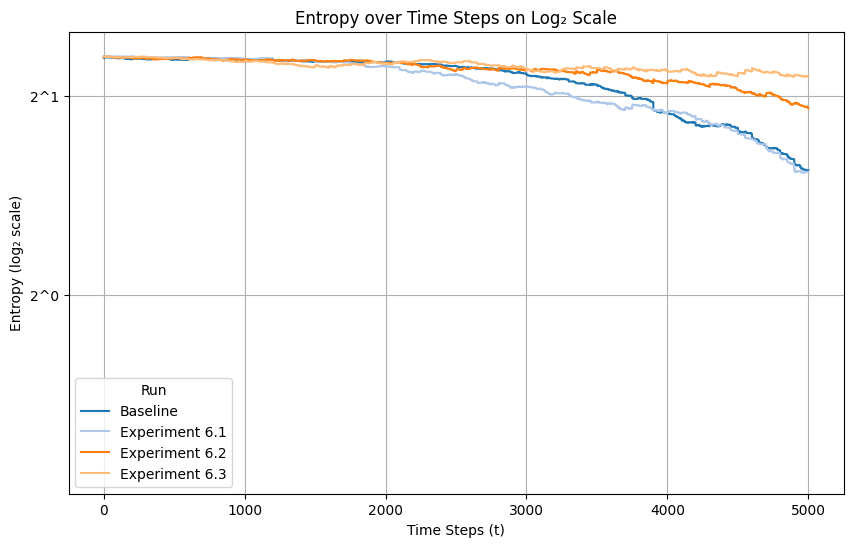

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with the appropriate data

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='run_index', y='entropy', hue='run', palette='tab20', errorbar=None)

# Set the y-axis to a logarithmic scale in base 2
plt.yscale('log', base=2)

# To handle the display of fractional powers of base 2, you might need to customize the y-ticks:
y_ticks = [2**0, 2**1, 2**2]  # example ticks for negative and positive powers
plt.yticks(y_ticks, labels=[f'2^{np.log2(y):.0f}' for y in y_ticks])

plt.xlabel('Time Steps (t)')
plt.ylabel('Entropy (log₂ scale)')
plt.ylim(0.5, 2.5)  # adjust the limits to ensure they are positive and within the range of your data
plt.grid(True)
plt.legend(title='Run')
plt.title('Entropy over Time Steps on Log₂ Scale')
plt.savefig(f'plots/polarisation/entropy/experiment-{experiment}-entropy-ylog2.png', dpi=300)
plt.show()



In [38]:
import pandas as pd

# Sample DataFrame 'df' structure
data = {
    'run_index': range(5001),  # Assuming continuous time steps from 0 to 5000
    'entropy': np.random.random(5001),  # Random entropy values for demonstration
    'run': ['Baseline'] * 1001 + ['Experiment 1.1'] * 1000 + ['Experiment 1.2'] * 1000 + ['Experiment 1.3'] * 1000 + ['Baseline'] * 1000
}

df = pd.DataFrame(data)

# Filtering the DataFrame for the specified time steps
time_steps = [0, 1250, 2500, 3750, 5000]
filtered_df = df[df['run_index'].isin(time_steps)]

# Pivot the DataFrame to make 'runs' as columns and 'run_index' as rows
result_df = filtered_df.pivot(index='run_index', columns='run', values='entropy')

# Display the DataFrame
print(result_df)



run        Baseline  Experiment 1.1  Experiment 1.2  Experiment 1.3
run_index                                                          
0          0.187570             NaN             NaN             NaN
1250            NaN        0.388635             NaN             NaN
2500            NaN             NaN        0.937684             NaN
3750            NaN             NaN             NaN        0.847103
5000       0.025288             NaN             NaN             NaN


/var/folders/nn/hn0h6qzj527_8l56th_8y2zm0000gn/T/ipykernel_98130/403512374.py:13: RankWarning: Polyfit may be poorly conditioned
  yp = np.poly1d(np.polyfit(factions, bubble_sizes, 3))(xp)


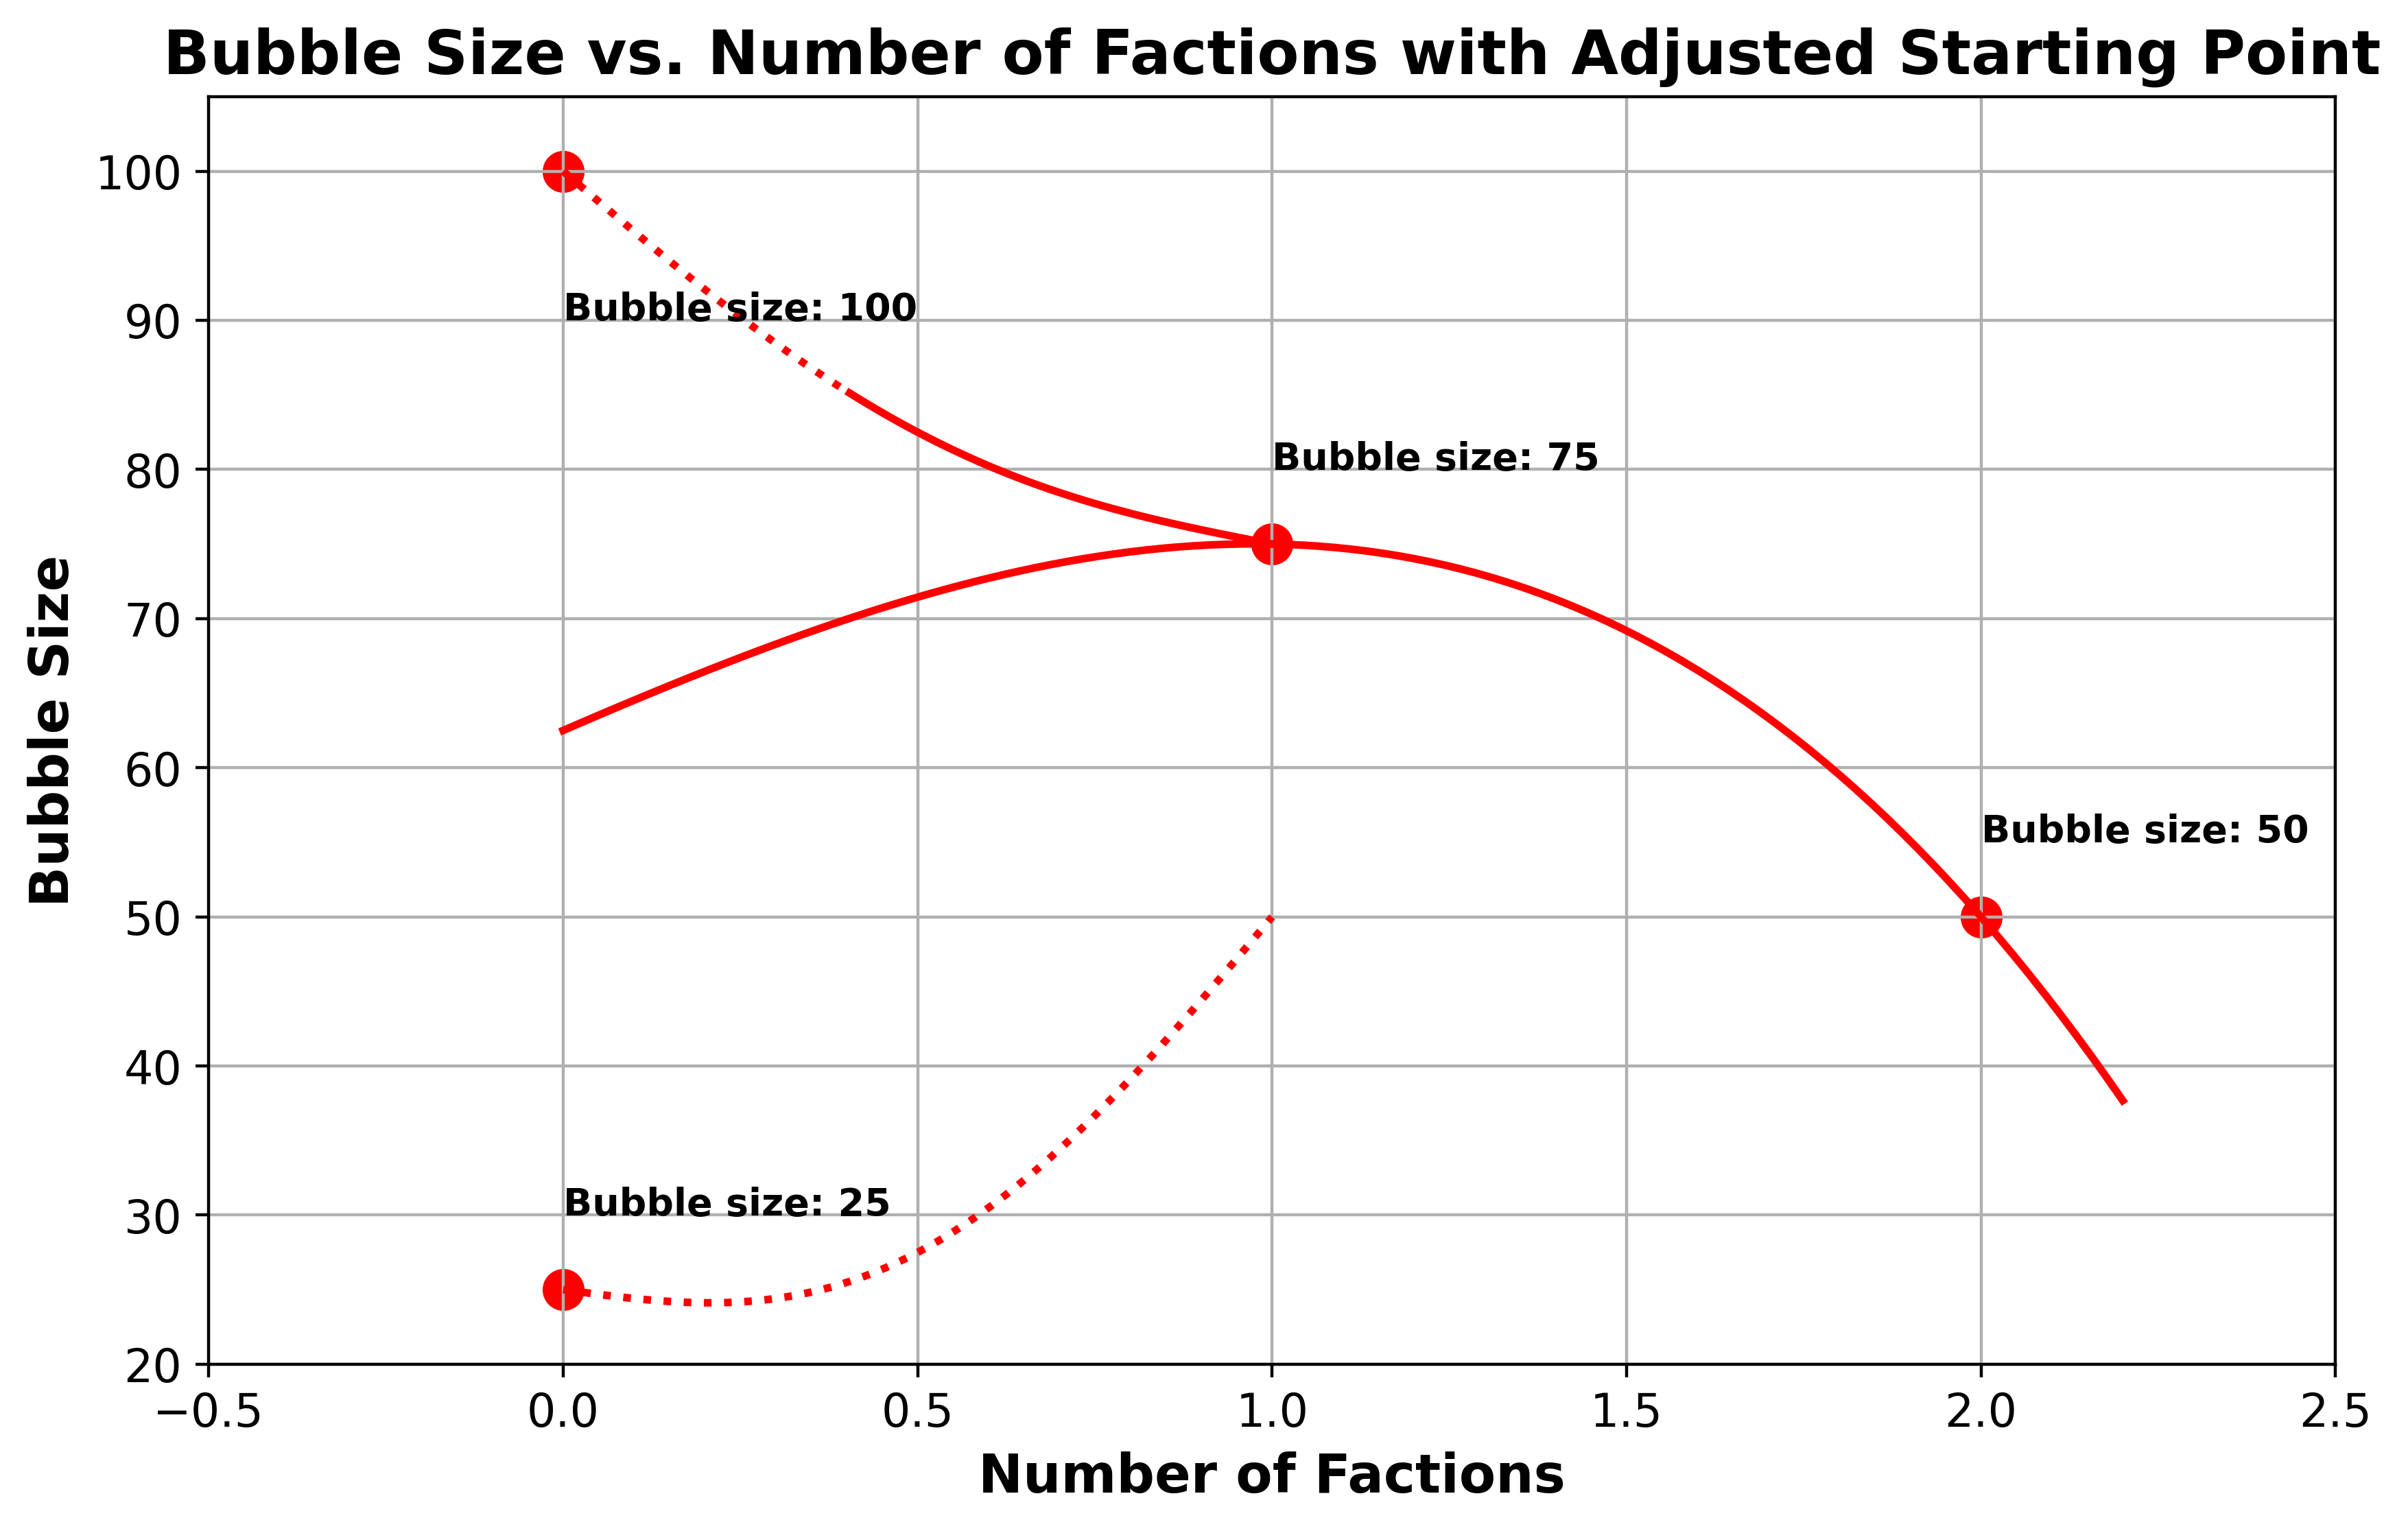

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Define factions and corresponding bubble sizes
factions = np.array([0, 2, 1, 0])  # Number of factions
bubble_sizes = np.array([25, 50, 75, 100])

# Create a plot with increased size and high resolution
fig, ax = plt.subplots(figsize=(10, 6), dpi=400)

# Main S-curve plotting starting at x = 0
xp = np.linspace(0, 2.2, 100)  # Ensure the red line starts at x = 0
yp = np.poly1d(np.polyfit(factions, bubble_sizes, 3))(xp)
ax.plot(xp, yp, linestyle='-', color='red', linewidth=2)  # Enhanced line width
ax.scatter(factions, bubble_sizes, color='red', s=100)  # Larger markers

# Function to create curved transitions with specified styles
def create_curved_transition_corrected(start, end, ax, fraction_solid=0.5, invert_dashes=False):
    x_values = np.linspace(start[0], end[0], 100)
    y_values = np.interp(x_values, [start[0], end[0]], [start[1], end[1]])
    y_values += (np.sin(np.linspace(0, np.pi, 100)) * (end[1] - start[1]) * 0.2)  # Curve adjustment
    idx = int(fraction_solid * len(x_values))
    solid_style = '-' if not invert_dashes else ':'
    dashed_style = ':' if not invert_dashes else '-'
    ax.plot(x_values[:idx], y_values[:idx], linestyle=solid_style, color='red', linewidth=2)
    ax.plot(x_values[idx:], y_values[idx:], linestyle=dashed_style, color='red', linewidth=2)

# Transition from bubble size 100 to 75 with inverted line styles
create_curved_transition_corrected((0, 100), (1, 75), ax, 0.4, invert_dashes=True)

# Transition from bubble size 25 to 50 as a downward curved dotted line
x_transition_new = np.linspace(0, 1, 100)
y_transition_new = np.interp(x_transition_new, [0, 1], [25, 50])
y_transition_new -= (np.sin(np.linspace(0, np.pi, 100)) * 10)  # Applying a downward curve
ax.plot(x_transition_new, y_transition_new, linestyle=':', color='red', linewidth=2)

# Annotations for bubble sizes
annotations = ["Bubble size: 25", "Bubble size: 50", "Bubble size: 75", "Bubble size: 100"]
for i, txt in enumerate(annotations):
    offset = -10 if i == 3 else 5  # Ensure the bubble size 100 label is inside the graph
    ax.annotate(txt, (factions[i], bubble_sizes[i] + offset), fontsize='medium', fontweight='bold')

# Enhancing overall aesthetics
ax.set_xlabel("Number of Factions", fontsize=14, fontweight='bold')
ax.set_ylabel("Bubble Size", fontsize=14, fontweight='bold')
ax.set_title("Bubble Size vs. Number of Factions with Adjusted Starting Point", fontsize=16, fontweight='bold')
ax.set_ylim(20, 105)
ax.set_xlim(-0.5, 2.5)
ax.grid(True)
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()
